# Spinning a penny

In [12]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import math as m
import scipy.stats as stats

%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

Populating the interactive namespace from numpy and matplotlib


In [13]:
np.random.seed(17)

draws_5 = 5
coin_sample = np.random.binomial(1, 0.5, draws_5)
coin_average = [coin_sample[:jj].mean() for jj in range(1, draws_5)]

heads = np.sum(coin_sample[coin_sample==1])
print('Heads: ', heads, heads/draws_5)
print('Tails: ', 5-heads, 1-heads/draws_5)

Heads:  2 0.4
Tails:  3 0.6


In [14]:
np.random.seed(17)

draws_10 = 10
coin_sample = np.random.binomial(1, 0.5, draws_10)
coin_average = [coin_sample[:jj].mean() for jj in range(1, draws_10)]

heads = np.sum(coin_sample[coin_sample==1])
print('Heads: ', heads, heads/draws_10)
print('Tails: ', 10-heads, 1-heads/draws_10)

Heads:  5 0.5
Tails:  5 0.5


In [15]:
np.random.seed(17)

draws_30 = 30
coin_sample = np.random.binomial(1, 0.5, draws_30)
coin_average = [coin_sample[:jj].mean() for jj in range(1, draws_30)]

heads = np.sum(coin_sample[coin_sample==1])
print('Heads: ', heads, heads/draws_30)
print('Tails: ', 30-heads, 1-heads/draws_30)

Heads:  14 0.4666666666666667
Tails:  16 0.5333333333333333


In [16]:
np.random.seed(17)

draws_60 = 60
coin_sample = np.random.binomial(1, 0.5, draws_60)
coin_average = [coin_sample[:jj].mean() for jj in range(1, draws_60)]

heads = np.sum(coin_sample[coin_sample==1])
print('Heads: ', heads, heads/draws_60)
print('Tails: ', 60-heads, 1-heads/draws_60)

Heads:  31 0.5166666666666667
Tails:  29 0.4833333333333333


# Test the results with hypothesis testing using as a null hypothesis p=0.5.

In [6]:
# Using binom_test

pval_5 = stats.binom_test(x=[2,3],p=0.5, alternative='two-sided')
print(pval_5)
if pval_5 < 0.05:    # p_value is 0.05 or 5%
   print("we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

pval_10 = stats.binom_test(x=[5,5],p=0.5,alternative='two-sided')
print(pval_10)
if pval_10 < 0.05:
    print('we are rejecting null hypothesis')
else:
    print('we are accepting null hypothesis')

pval_30 = stats.binom_test(x=[14,16],p=0.5,alternative='two-sided')
print(pval_30)
if pval_30 < 0.05:
    print('we are rejecting null hypothesis')
else:
    print('we are accepting null hypothesis')

pval_60 = stats.binom_test(x=[31,29],p=0.5,alternative='two-sided')
print(pval_60)
if pval_60 < 0.05:
    print('we are rejecting null hypothesis')
else:
    print('we are accepting null hypothesis')

1.0
we are accepting null hypothesis
1.0
we are accepting null hypothesis
0.5846647117286928
we are accepting null hypothesis
0.8974218269914307
we are accepting null hypothesis


In [17]:
# Using chisquare

print(stats.chisquare(f_obs=[3,2]))
print(stats.chisquare(f_obs=[5,5]))
print(stats.chisquare(f_obs=[13,17]))
print(stats.chisquare(f_obs=[31,29]))

Power_divergenceResult(statistic=0.2, pvalue=0.6547208460185768)
Power_divergenceResult(statistic=0.0, pvalue=1.0)
Power_divergenceResult(statistic=0.5333333333333333, pvalue=0.4652088184521417)
Power_divergenceResult(statistic=0.06666666666666667, pvalue=0.7962534147376392)


In [18]:
# Using binom.cdf

p_value_2H = 2*(1-stats.binom.cdf(1,5,0.5))
p_value_5H = 2*(1-stats.binom.cdf(4,10,0.5))
p_value_14H = 2*(1-stats.binom.cdf(13,30,0.5))
p_value_31H = 2*(1-stats.binom.cdf(30,60,0.5))
print(p_value_2H,p_value_5H,p_value_14H,p_value_31H)

1.625 1.2460937499999998 1.415335288271307 0.8974218269914307


# What can we say about the way the confidence interval is evolving? 

In [81]:
# Confidence interval
alpha = 0.05
# n = 5
print(stats.binom.interval(1 - alpha, 5, 0.5))
# n = 10
print(stats.binom.interval(1-alpha, 10, 0.5))
# n = 30
print(stats.binom.interval(1-alpha,30,0.5))
# n = 60
print(stats.binom.interval(1-alpha,60,0.5))

(0.0, 5.0)
(2.0, 8.0)
(10.0, 20.0)
(22.0, 38.0)


# Verify if there's a correlation between the girls' heights or boys' heights vs their mothers' heights.

In [82]:
pearson = pd.read_csv('pearson.csv')

In [83]:
pearson.head(10)

,child,parent,frequency,gp,par,chl
0,59.5,62.5,0.50,fs,Father,Son
1,59.5,63.5,0.50,fs,Father,Son
2,59.5,64.5,1.00,fs,Father,Son
3,60.5,62.5,0.50,fs,Father,Son
4,60.5,66.5,1.00,fs,Father,Son
5,61.5,59.5,0.25,fs,Father,Son
6,61.5,60.5,0.25,fs,Father,Son
7,61.5,62.5,0.50,fs,Father,Son
8,61.5,63.5,1.00,fs,Father,Son
9,61.5,64.5,0.25,fs,Father,Son


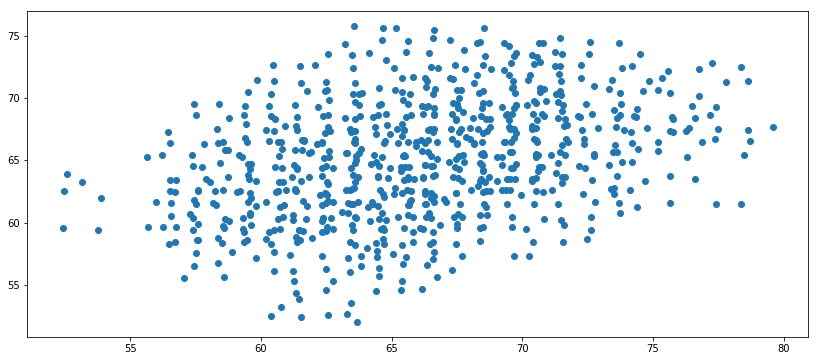

In [84]:
plt.scatter(
    pearson['child'] + np.random.normal(scale=0.2, size=pearson.shape[0]), 
    pearson['parent'] + np.random.normal(scale=0.2, size=pearson.shape[0]))

In [91]:
ms = pearson[pearson['gp']=='ms']
md = pearson[pearson['gp']=='md']

In [96]:
fs = pearson[pearson['gp']=='fs']
fd = pearson[pearson['gp']=='fd']

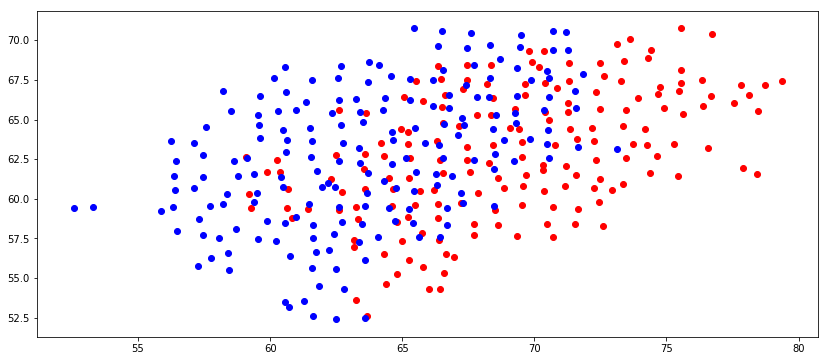

In [97]:
# comparison between son and mother height
plt.scatter(
    ms['child'] + np.random.normal(scale=0.2, size=ms.shape[0]), 
    ms['parent'] + np.random.normal(scale=0.2, size=ms.shape[0]), c='r')

# comparison between daughter and mother height
plt.scatter(
    md['child'] + np.random.normal(scale=0.2, size=md.shape[0]), 
    md['parent'] + np.random.normal(scale=0.2, size=md.shape[0]), c='b')
plt.show()

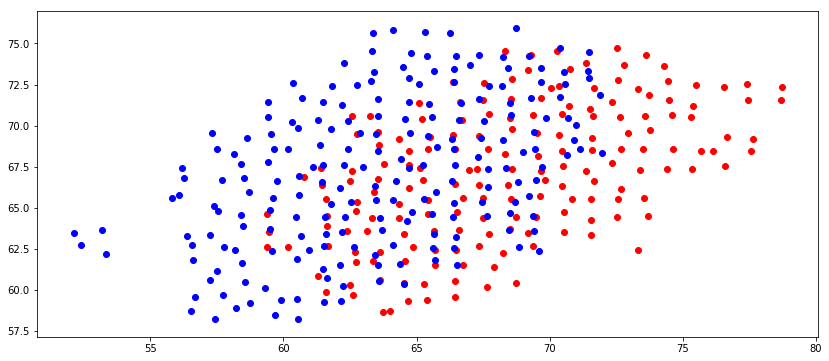

In [98]:
plt.scatter(
    fs['child'] + np.random.normal(scale=0.2, size=fs.shape[0]), 
    fs['parent'] + np.random.normal(scale=0.2, size=fs.shape[0]), c='r')
plt.scatter(
    fd['child'] + np.random.normal(scale=0.2, size=fd.shape[0]), 
    fd['parent'] + np.random.normal(scale=0.2, size=fd.shape[0]), c='b')
plt.show()

# Measure the correlation coefficient between these variables

In [93]:
# between mother and son heights
stats.pearsonr(ms['parent'], ms['child'])

(0.48491768425178605, 9.100362271635801e-12)

In [95]:
# between mother and daughter heights
stats.pearsonr(md['parent'], md['child'])

(0.4674367713012403, 1.9747722235596415e-11)

In [99]:
# between father and son heights
stats.pearsonr(fs['parent'], fs['child'])

(0.5206723830914773, 7.954369816601005e-14)

In [100]:
# between father and daughter heights
stats.pearsonr(fd['parent'], fd['child'])

(0.47205300652210364, 7.905672025206177e-13)

We notice that we have a weak-moderate correlation (relationship) between mothers' heights and daughters'/sons' heights. That means that this weak correlation does not necessarily imply that the height of the children is genetically determined by the height of the mother. We notice the same thing for the correlation between fathers' and daughters' heights. 
The correlation between fathers' and sons' heights is a moderately strong one. But this hypothesis is not sufficient to say that the height of the boys is determined strictly by the height of their fathers. 
All of these correlations determine a positive relationship means that larger scores on one variable are associated with larger scores the other variable.